# Betsy Zimmermann
## *Project_02: Billboard Top 100 Analysis*

## 1. Include a problem statement

- How does song length correlate with billboard success?
- What are the average track lengths and success rates for each genre? 
- Are there genres that achieve success with outlying average song length?
- Bonus: Are there outlying artists within those genres that have succeeded in breaking their genre norms? 


## 2. State the risks and assumptions of your data

#### Assumptions: 
- "Success" in this case has been measured by number of weeks on the billboard chart.

#### Risks: 
- Genre labels are subjective and thus expose risk for data inaccuracy.
- "Success" can be measured by other indicators; for example, average rank on the billboard chart.
- Sample size is relatively small; there are only 317 entries for 2000. An analysis of additional years would be more informative. 

## 3. Import data using the Pandas library

### First, import the csv file:

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/ebzimm/GA-DSI/Projects/project-02/assets/billboard.csv')

### Next, clean the data. 

In [41]:
# Replace all '*' values in the dataset to int(101)

def replace_nulls(value):
    if value == '*':
        return 101
    else:
        return value
    
df = df.applymap(replace_nulls)

In [42]:
# Change the 'time' column to track length measured in seconds

def to_seconds(value):
    split = value.split(',')
    return int(split[0])*60 + int(split[1])

df['time'] = df['time'].map(to_seconds)

In [44]:
# Change 'date.entered' and 'date.peaked' columns to datetime format

df['date.entered']=pd.to_datetime(df['date.entered'])
df['date.peaked']=pd.to_datetime(df['date.peaked'])

In [48]:
# Consolidate duplicative 'genre' names

def replace_genres(value):
    if value == 'R & B':
        return 'R&B'
    if value == 'Rock\'n\'roll':
        return 'Rock'
    else:
        return value
    
df = df.applymap(replace_genres)

In [50]:
# Isolate '...week' columns and change dtypes to integers

weeks = df.iloc[:, 7:83]

def turn_int(value):
    try: 
        return int(value)
    except:
        return 101
    
weeks = weeks.applymap(turn_int)

In [55]:
# Create new column to describe the # of weeks each track lived on Billboard Top 100

i=0
l=[]
ml=[]
while i<len(weeks['x1st.week']):
    for x in weeks:
        if weeks.loc[i,x] != 101:
            l.append(weeks.loc[i,x])
        else:
            pass
    ml.append(len(l))
    l=[]
    i+=1

wks_on_bb = pd.DataFrame(ml,dtype=int)
wks_on_bb.columns = ['wks_on_bb']

In [56]:
# Bring together the first 8 columns, '...weeks' columns, and 'wks_on_bb' to complete the edited data set

firstcols = df.iloc[:, :7]
fulldata = pd.concat([firstcols, weeks, wks_on_bb], axis = 1)

### Finally, check the data. 

In [71]:
# Check data types

fulldata.dtypes

year                        int64
artist.inverted            object
track                      object
time                        int64
genre                      object
date.entered       datetime64[ns]
date.peaked        datetime64[ns]
x1st.week                   int64
x2nd.week                   int64
x3rd.week                   int64
x4th.week                   int64
x5th.week                   int64
x6th.week                   int64
x7th.week                   int64
x8th.week                   int64
x9th.week                   int64
x10th.week                  int64
x11th.week                  int64
x12th.week                  int64
x13th.week                  int64
x14th.week                  int64
x15th.week                  int64
x16th.week                  int64
x17th.week                  int64
x18th.week                  int64
x19th.week                  int64
x20th.week                  int64
x21st.week                  int64
x22nd.week                  int64
x23rd.week    

## 4. Perform exploratory data analysis

### T Test

In [173]:
from scipy import stats

stats.ttest_ind(fulldata['time'], fulldata2['wks_on_bb'], equal_var=False)

print 'The t-statistic is: 92.66'
print 'The p-value is: 8.11'

The t-statistic is: 92.66
The p-value is: 8.11


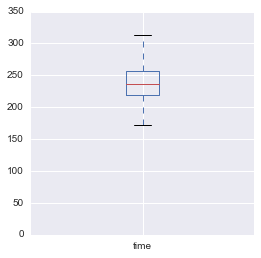

In [161]:
# Get a feel for range and distribution of 'time' with a box plot

timebox = fulldata2['time'].plot(kind='box', figsize=(4,4), ylim=(0,350))

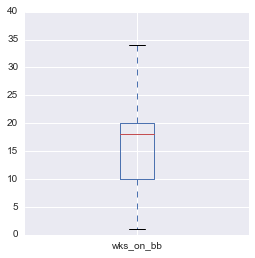

In [163]:
# Get a feel for range and distribution of 'wks_on_bb' with a box plot

wksbox = fulldata2['wks_on_bb'].plot(kind='box', figsize=(4,4), ylim=(0,40))

### Pivot Tables

In [72]:
pd.pivot_table(fulldata, index=['genre'], values=['time', 'wks_on_bb'])

,time,wks_on_bb
genre,,
Country,226.689189,16.216216
Electronica,270.750000,18.000000
Gospel,330.000000,20.000000
Jazz,470.000000,5.000000
Latin,254.444444,19.222222
Pop,225.000000,15.222222
R&B,242.956522,11.347826
Rap,243.396552,14.431034
Reggae,257.000000,15.000000


In [75]:
# Just for fun: eyeball for outlying artists within genres

pd.pivot_table(fulldata, index=['genre', 'artist.inverted'], values=['time', 'wks_on_bb'])

time  wks_on_bb
genre   artist.inverted                               
Country Adkins, Trace            185.000000  11.000000
        Allan, Gary              258.000000   5.000000
        Black, Clint             328.000000  20.000000
        Brock, Chad              218.000000  11.500000
        Brooks & Dunn            178.000000  19.000000
        Brooks, Garth            176.000000   6.000000
        Byrd, Tracy              270.000000   8.000000
        Cagle, Chris             182.000000  11.000000
        Chesney, Kenny           239.500000  18.500000
        Clark Family Experience  176.000000  12.000000
        Clark, Terri             187.000000   6.000000
        Cyrus, Billy Ray         225.000000  13.000000
        Davidson, Clay           236.000000  20.000000
        Diffie, Joe              189.000000  10.000000
        Dixie Chicks, The        268.500000  16.250000
        Evans, Sara              336.000000  20.000000
        Gill, Vince              253.000000  20.000000
        Gilman, Billy            247.000000  19.000000
        Griggs, Andy             199.000000  20.000000
        Hanson                   254.000000   7.000000
        Hart, Beth               227.000000  12.000000
        Heatherly, Eric          196.000000  20.000000
        Herndon, Ty              283.000000   8.000000
        Jackson, Alan            171.000000  17.333333
        Keith, Toby              214.000000  17.500000
        Lawrence, Tracy          175.000000  20.000000
        Lonestar                 229.333333  31.666667
        Loveless, Patty          207.000000  14.000000
        McBride, Martina         259.500000  16.500000
        McEntire, Reba           234.500000  20.000000
...                                     ...        ...
Rock    Ruff Endz                236.000000  26.000000
        Sammie                   249.000000  20.000000
        Santana                  258.000000  26.000000
        Savage Garden            264.000000  26.500000
        Simpson, Jessica         231.000000   6.000000
        Sisqo                    236.333333  24.666667
        Sister Hazel             242.000000  20.000000
        Smash Mouth              184.000000  26.000000
        Sonique                  228.000000  24.000000
        SoulDecision             205.000000  24.000000
        Spears, Britney          227.666667  17.000000
        Spencer, Tracie          251.000000   3.000000
        Sting                    232.000000  26.000000
        Stone Temple Pilots      256.000000  13.000000
        Sugar Ray                255.000000  20.000000
        TLC                      276.000000   7.000000
        Tamar                    242.000000   6.000000
        Tamia                    218.000000   5.000000
        Third Eye Blind          243.500000  17.000000
        Thomas, Carl             266.000000  17.000000
        Train                    235.000000  27.000000
        Tuesday                  246.000000   2.000000
        Usher                    216.000000   7.000000
        Vertical Horizon         233.000000  31.000000
        Vitamin C                236.500000  10.500000
        Wallflowers, The         209.000000   6.000000
        Westlife                 247.000000  20.000000
        Williams, Robbie         236.000000  19.000000
        Zombie Nation            210.000000   2.000000
        matchbox twenty          252.000000  39.000000

[229 rows x 2 columns]

## 5. Use Tableau and/or Python plotting modules to visualize data

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Visualize frequency distributions with histograms

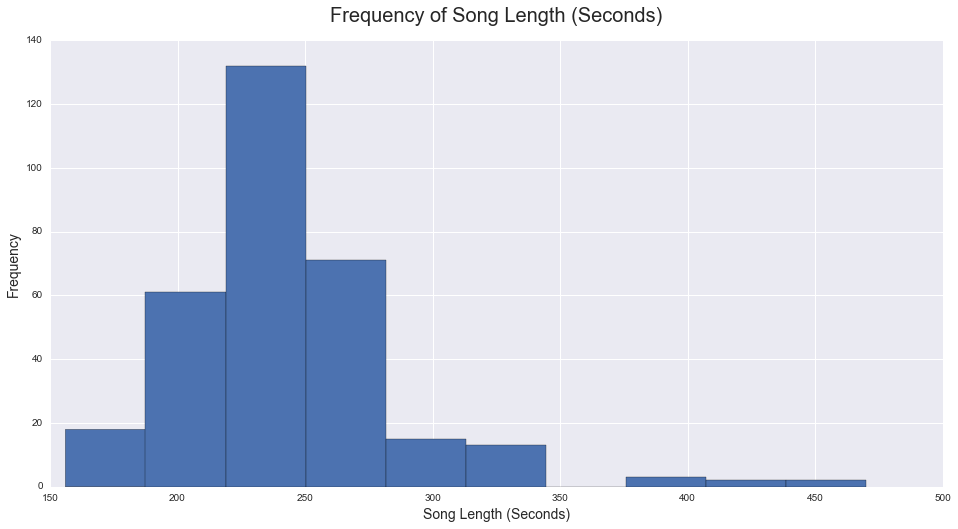

In [179]:
timehist = fulldata2['time'].plot(kind='hist', figsize=(16,8))

timehist.set_title('Frequency of Song Length (Seconds)', fontsize=20, y=1.03)
timehist.set_ylabel('Frequency', fontsize=14)
timehist.set_xlabel('Song Length (Seconds)', fontsize=14)

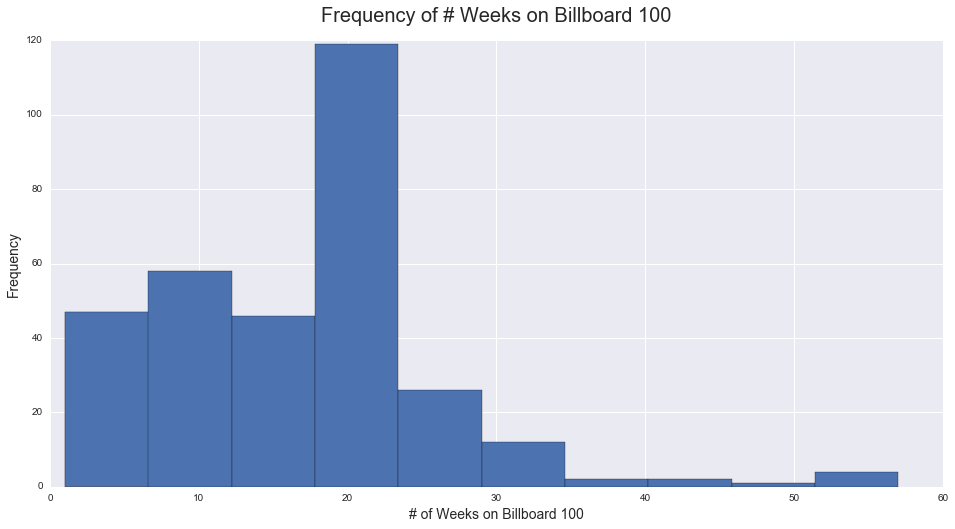

In [110]:
wks_hist = fulldata2['wks_on_bb'].plot(kind='hist', figsize=(16,8))

wks_hist.set_title('Frequency of # Weeks on Billboard 100', fontsize=20, y=1.03)
wks_hist.set_ylabel('Frequency', fontsize=14)
wks_hist.set_xlabel('# of Weeks on Billboard 100', fontsize=14)

### Visualize correlation between 'time' and 'wks_on_bb'

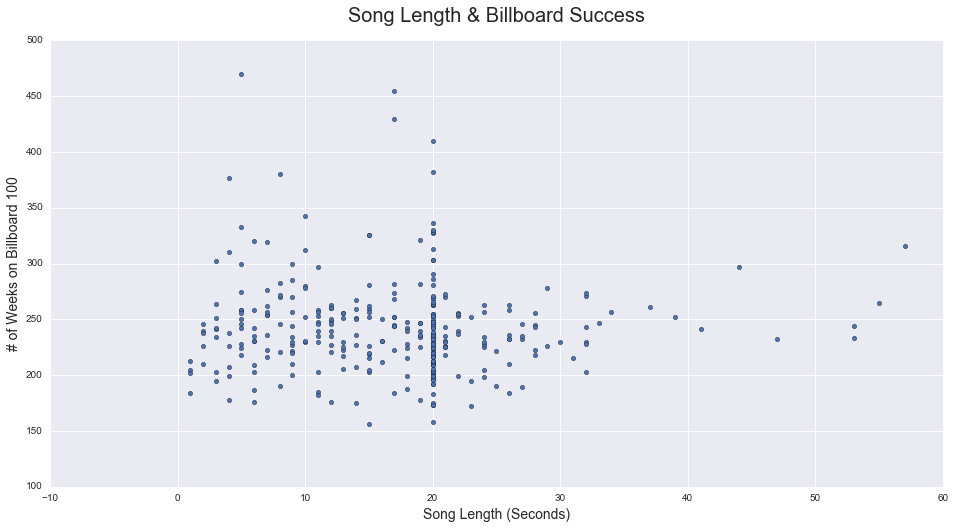

In [178]:
scat = fulldata.plot.scatter('wks_on_bb','time', figsize=(16,8))

scat.set_title('Song Length & Billboard Success', fontsize=20, y=1.03)
scat.set_xlabel('Song Length (Seconds)', fontsize=14)
scat.set_ylabel('# of Weeks on Billboard 100', fontsize=14)

### Visualize relationship between 'genre,' 'time,' and 'wks_on_bb'

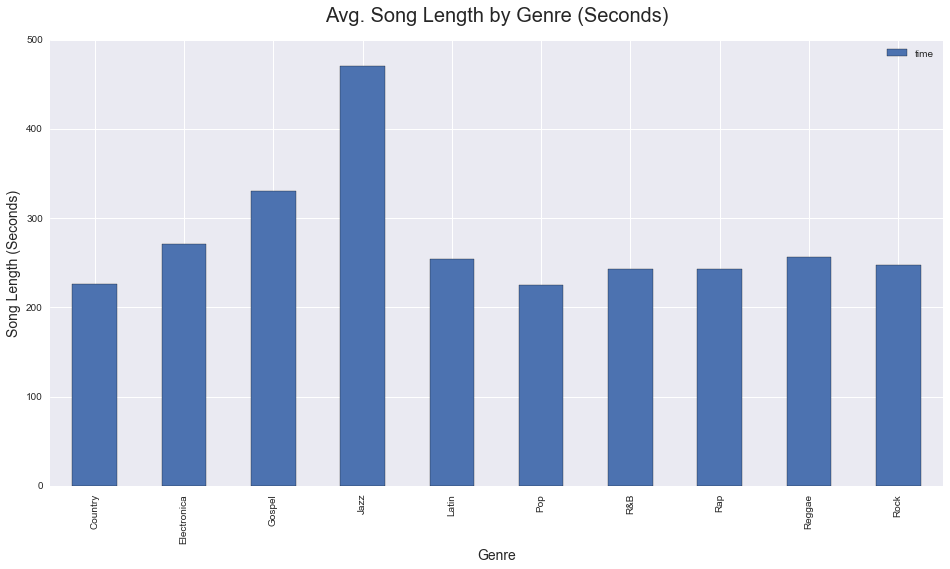

In [119]:
gt = fulldata2.groupby('genre')['time'].mean().to_frame()

gen_time = gt.plot(kind='bar', figsize=(16,8))

gen_time.set_title('Avg. Song Length by Genre (Seconds)', fontsize=20, y=1.03)
gen_time.set_ylabel('Song Length (Seconds)', fontsize=14)
gen_time.set_xlabel('Genre', fontsize=14)

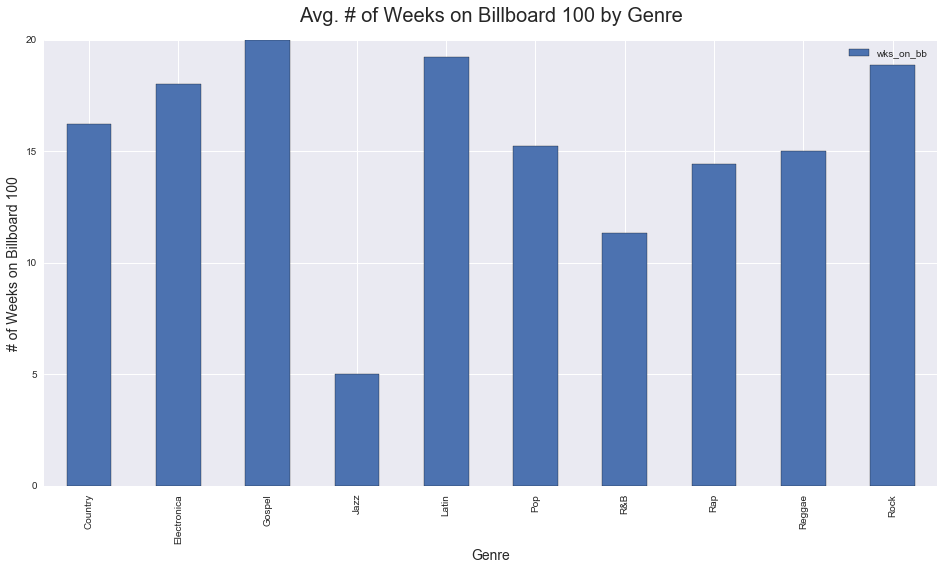

In [188]:
gw = fulldata2.groupby('genre')['wks_on_bb'].mean().to_frame()

gen_wks = gw.plot(kind='bar', figsize=(16,8))

gen_wks.set_title('Avg. # of Weeks on Billboard 100 by Genre', fontsize=20, y=1.03)
gen_wks.set_ylabel('# of Weeks on Billboard 100', fontsize=14)
gen_wks.set_xlabel('Genre', fontsize=14)

### Just for fun, add in artists
- This is objectively a bad graph; however, if you zoom in you'll see that some artists are clear outliers within their genre.
- Further research would be interesting to see if those artists had relative Billboard success (suggesting they have unique qualities that contribute to their outlying song lengths)

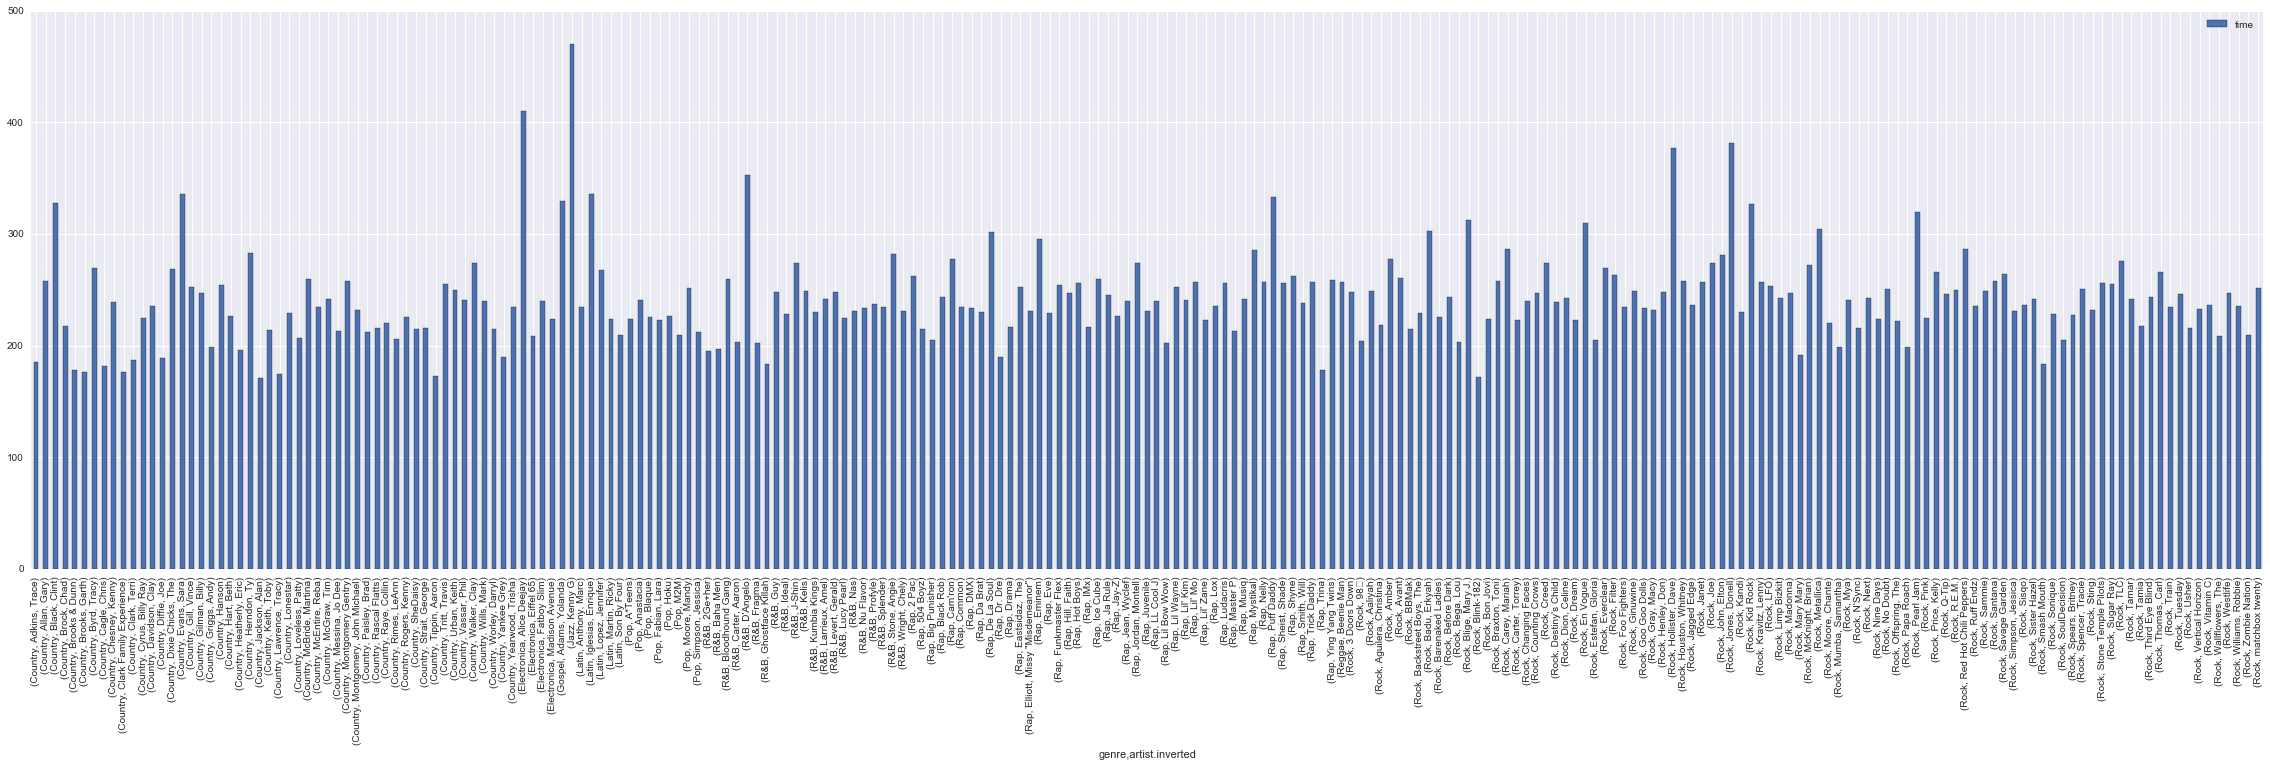

In [183]:
agt = fulldata2.groupby(['genre','artist.inverted'])['time'].mean().to_frame()

agt.plot(kind='bar', figsize=(40,10))

### Last, observe the relationships between 'date.entered,' 'date.peaked,' and 'time'

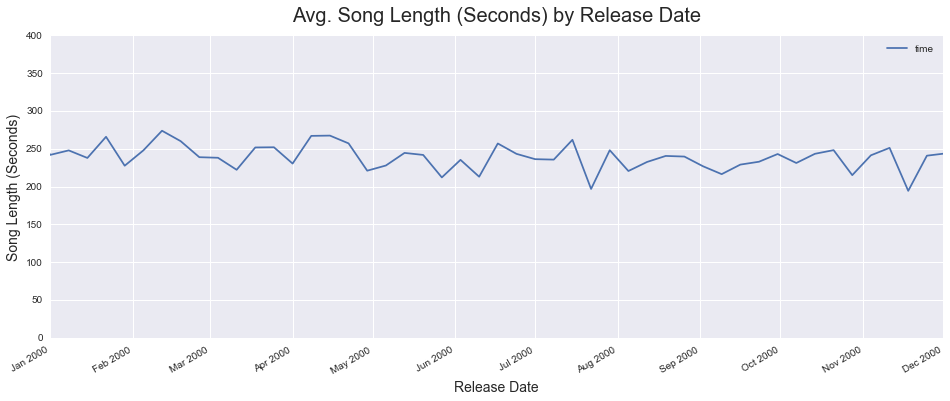

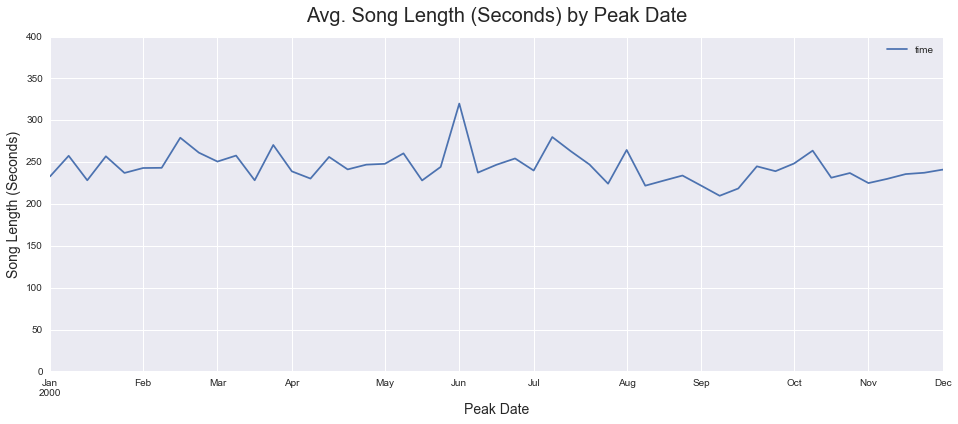

In [186]:
et = fulldata2.groupby('date.entered')['time'].mean().to_frame()
ent_t = et.plot(kind='line', figsize=(16,6), ylim=(0,400), xlim=('Jan 2000','Dec 2000'))
ent_t.set_ylabel('Song Length (Seconds)', fontsize=14)
ent_t.set_xlabel('Release Date', fontsize=14)
ent_t.set_title('Avg. Song Length (Seconds) by Release Date', fontsize=20, y=1.03)

pt = fulldata2.groupby('date.peaked')['time'].mean().to_frame()
peak_t = pt.plot(kind='line', figsize=(16,6), ylim=(0,400),xlim=('Jan 2000','Dec 2000'))
peak_t.set_ylabel('Song Length (Seconds)', fontsize=14)
peak_t.set_xlabel('Peak Date', fontsize=14)
peak_t.set_title('Avg. Song Length (Seconds) by Peak Date', fontsize=20, y=1.03)


## 6. Observe correlations in the data

## For the selected variables 'time,' and 'wks_on_bb,' and 'genre,' there are very few correlations.

### Song duration is not a good predictor of Billboard success, and vice versa. 
- The scatter plot with 'time' and 'wks_on_bb' suggests there is no clear relationship.

### By genre, we gather a few clear take-aways:
- Jazz has the longest average song length; Pop has the shortest.
- Gospel, Latin, and Rock have the longest average lifespans on the Billboard 100 list; Jazz has by far the shortest.

### Release and peak dates indicate a few trends: 
- There is little variance in song length across seasons. However, we do see that an outlying (long) song peaked in June.

## 7. Evaluate a hypothesis

### 1. Song duration has an effect on Billboard success.
- False. The correlation between song length and Billboard success (as measured by the # of weeks on the Billboard 100 list) is weak.

### 2. Specific genres succeed despite having outlying average song lengths.
- True. Gospel supports abnormally long song lengths and succeed on the Billboard 100 list. Pop supports abnormally short song lengths and also suceed on the Billboard 100 List.

### 3. Song length varies by season.
- False. There is little variance in song length throughout the year.

## 8. Present results in a polished companion blog post of at least 500 words (& 1-2 graphics!)